# 1 - Introduction

Name : Gilang Wiradhyaksa

Data : [Credit Card Default](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table)

Objective : The purpose of this project is to create a supervised machine learning to predict whether the customer will pay their credit card bills or not for the next month. Data set used is Credit Card Default from Google BigQuery. The model used in this project is classification model `Logistic Regression`, `SVM` and `KNN`. Metrics used to measure model performance is `Precision` because we want the model to have a more correct prediction.

# 2 - Import Libraries

In [1106]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV #, RandomizedSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

Data load from Google BigQuery with this SQL :

```sql
SELECT 

limit_balance, CAST(sex AS INT64) sex, CAST(education_level AS INT64) education_level, CAST(marital_status AS INT64) marital_status, 

age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) pay_5, CAST(pay_6 AS FLOAT64) pay_6, 

bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 

CAST(default_payment_next_month AS INT64) default_payment_next_month 

FROM bigquery-public-data.ml_datasets.credit_card_default LIMIT 1992
```

In [1107]:
pd.set_option('display.max_columns', None)

In [1108]:
#Data Asli
df_ori = pd.read_csv('credit_card_data.csv')

In [1109]:
df = df_ori.copy()
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [1110]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1982,240000.0,2,1,1,41.0,0.0,0.0,0.0,2.0,3.0,3.0,102488.0,105785.0,109082.0,119221.0,118144.0,118029.0,6500.0,6500.0,13500.0,2300.0,2002.0,0.0,0
1983,320000.0,2,2,2,29.0,1.0,2.0,0.0,0.0,3.0,2.0,93070.0,90725.0,92697.0,106221.0,104313.0,103251.0,0.0,3500.0,15100.0,11.0,3129.0,11.0,1
1984,30000.0,1,2,2,41.0,-1.0,0.0,0.0,0.0,3.0,2.0,9736.0,10453.0,11771.0,13032.0,12538.0,12187.0,1182.0,1500.0,1761.0,0.0,0.0,1100.0,0
1985,80000.0,2,1,1,25.0,3.0,2.0,2.0,2.0,3.0,3.0,6269.0,7212.0,7246.0,8073.0,8349.0,8420.0,1200.0,300.0,1100.0,700.0,500.0,0.0,1
1986,20000.0,1,2,2,36.0,0.0,0.0,2.0,2.0,3.0,2.0,11423.0,13976.0,13455.0,15227.0,14699.0,14313.0,2749.0,0.0,2000.0,0.0,0.0,1230.0,0
1987,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3.0,2.0,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1
1988,100000.0,1,2,1,44.0,2.0,2.0,2.0,2.0,3.0,2.0,59586.0,60842.0,61749.0,65130.0,63816.0,65011.0,2800.0,2500.0,5000.0,0.0,2400.0,2400.0,1
1989,20000.0,1,2,2,24.0,2.0,3.0,2.0,2.0,3.0,2.0,21034.0,19839.0,18663.0,20394.0,19228.0,19615.0,0.0,0.0,2616.0,0.0,1400.0,0.0,0
1990,130000.0,1,2,2,31.0,3.0,2.0,2.0,3.0,3.0,2.0,300.0,300.0,300.0,300.0,300.0,150.0,0.0,0.0,0.0,0.0,0.0,1000.0,1
1991,30000.0,1,2,2,30.0,1.0,3.0,2.0,2.0,3.0,2.0,25907.0,25209.0,24524.0,29397.0,28628.0,32009.0,0.0,0.0,5621.0,0.0,4000.0,1500.0,1


Display the first 10 data and the last 10 data

Description for each column :
- `Sex` : 1=Male, 2=Female
- `Education Level` : 1=Graduate School, 2=University, 3=High School, 4=Others, 5=Unknown, 6=Unknown
- `Marital Status` : 1=Married, 2=Single, 3=Others
- `Pay` : -2=Paid but Inactive, -1=Paid in full, 0=Pay minimum amount, 1=Payment Delay for 1 month, 2=Payment Delay for 2 month, . . . , 6=Payment Delay for 9 month

In [1111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               1992 non-null   float64
 1   sex                         1992 non-null   int64  
 2   education_level             1992 non-null   int64  
 3   marital_status              1992 non-null   int64  
 4   age                         1992 non-null   float64
 5   pay_0                       1992 non-null   float64
 6   pay_2                       1992 non-null   float64
 7   pay_3                       1992 non-null   float64
 8   pay_4                       1992 non-null   float64
 9   pay_5                       1992 non-null   float64
 10  pay_6                       1992 non-null   float64
 11  bill_amt_1                  1992 non-null   float64
 12  bill_amt_2                  1992 non-null   float64
 13  bill_amt_3                  1992 

In [1112]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,147429.718876,1.594880,1.902610,1.582831,34.642068,0.256024,0.251004,0.251004,0.248494,0.296185,0.176205,69521.157129,68598.183735,66350.431727,61828.153614,57099.735944,54759.527610,6778.048695,6.903594e+03,5651.228916,3824.274096,4630.805221,5141.704819,0.237952
std,123071.849507,0.491039,0.763661,0.519017,9.222998,0.893480,0.947782,0.888709,0.797408,0.721086,0.849602,76998.969894,75470.887202,72973.120126,65723.397462,62359.251508,61496.281138,22685.713071,3.348283e+04,15157.064893,9233.368231,15325.689807,13881.461447,0.425936
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,-2.000000,-3309.000000,-67526.000000,-9850.000000,11.000000,-3000.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17613.750000,17688.000000,18252.500000,18205.500000,16668.000000,15014.500000,1562.750000,1.500000e+03,1100.000000,736.000000,924.750000,700.000000,0.000000
50%,110000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45210.000000,44664.500000,42654.000000,38153.500000,31983.000000,30106.500000,2984.500000,2.736500e+03,2200.000000,2000.000000,2000.000000,2000.000000,0.000000
75%,210000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94699.500000,93349.500000,89990.500000,85356.000000,79777.500000,76914.500000,5500.000000,5.200000e+03,5000.000000,4058.250000,4268.500000,4500.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,6.000000,5.000000,4.000000,3.000000,3.000000,4.000000,613860.000000,512526.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,170039.000000,388071.000000,171574.000000,1.000000


In [1113]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [1114]:
# Check duplicated data
df.duplicated().sum()

0

Based on those calculation, there is no duplicate data found from the dataset.

In [1115]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Based on those information, there is no missing value found from the dataset.

# 4 - Exploratory Data Analysis (EDA)

In [1116]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


## 4.1 - Numerical Column

In [1117]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

In [1118]:
exploreNumCol(df, 'age')

Mean age = 34.64
Median age = 33.0
Modus age = 27.0
Min age = 21.0
Max age = 69.0
Skewness age = 0.8297977986849201, data distribution is not normal


[Text(0.5, 1.0, 'Age')]

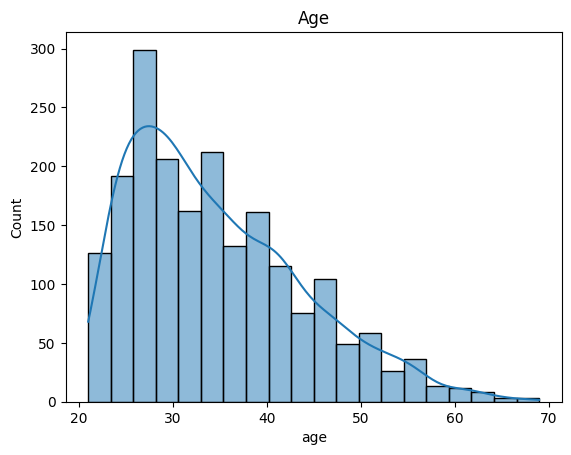

In [1119]:
sns.histplot(df['age'], bins=20, kde=True).set(title='Age')

Based on skewness calculation, column _age_ skewness is 0.83 which is skew positive, meaning the data distribution is not normal.

In [1120]:
exploreNumCol(df, 'limit_balance')

Mean limit_balance = 147429.72
Median limit_balance = 110000.0
Modus limit_balance = 50000.0
Min limit_balance = 10000.0
Max limit_balance = 800000.0
Skewness limit_balance = 1.2787334518886846, data distribution is not normal


[Text(0.5, 1.0, 'limit_balance')]

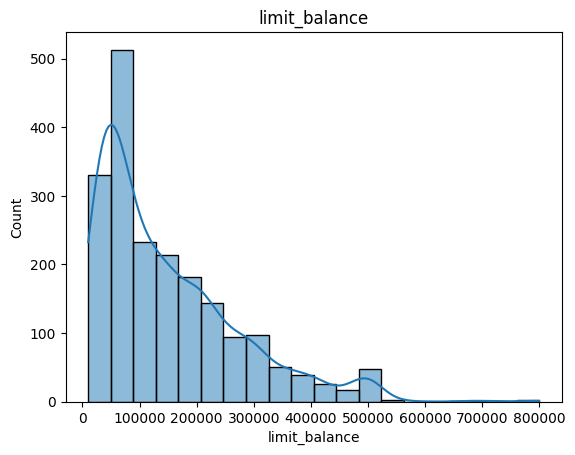

In [1121]:
sns.histplot(df['limit_balance'], bins=20, kde=True).set(title='limit_balance')

Based on skewness calculation, column _limit\_balance_ skewness is 1.27 which is skew positive, meaning the data distribution is not normal.

In [1122]:
df_amt = pd.DataFrame()
bill_amt = []
pay_amt = []
for i in range(1, 7):
    bill_amt.append(df['bill_amt_' + str(i)].mean())
    pay_amt.append(df['pay_amt_' + str(i)].mean())
df_amt['bill_amt'] = bill_amt
df_amt['pay_amt'] = pay_amt
df_amt

,bill_amt,pay_amt
0,69521.157129,6778.048695
1,68598.183735,6903.594378
2,66350.431727,5651.228916
3,61828.153614,3824.274096
4,57099.735944,4630.805221
5,54759.527610,5141.704819


In [1123]:
# df_amt = pd.DataFrame(columns=['month', 'bill_type', 'amount'])
# for i in range(1, 7):
#     df_amt.loc[len(df_amt)] = [i, 'Bill Amount', df['bill_amt_' + str(i)].mean()]
#     df_amt.loc[len(df_amt)] = [i, 'Payment Amount', df['pay_amt_' + str(i)].mean()]
# df_amt

Text(0.5, 1.0, 'Payment')

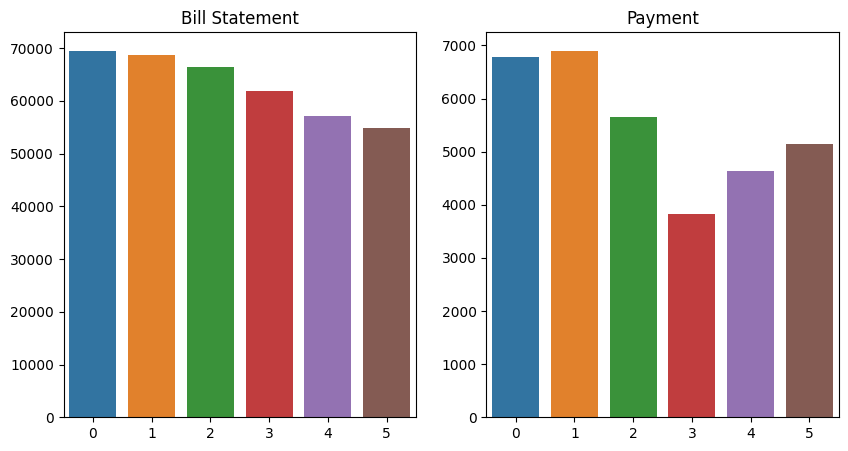

In [1124]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
axis_label = sns.barplot(ax=ax[0], data=df_amt, x=df_amt['bill_amt'].index, y=bill_amt, orient='v')
ax[0].set_title('Bill Statement')
# axis_label.bar_label(axis_label.containers[0])

axis_label = sns.barplot(ax=ax[1], data=df_amt, x=df_amt['pay_amt'].index, y=pay_amt, orient='v')
ax[1].set_title('Payment')
# axis_label.bar_label(axis_label.containers[0])

Average amount of bill statement is decrease every month, showing people using their credit card less during this period.

## 4.2 - Categorical Column

### 4.2.1 - Nominal

In [1125]:
df.rename(columns={"pay_0": "pay_1", "default_payment_next_month": "def_pay"}, inplace=True)

Renaming pay_0 to pay_1 to fit the name with bill_amt1 column and pay_amt1 column. Also renaming default_payment_next_month to def_pay to make it easy to type and read.

In [1126]:
def sns_barplot(groupby_column, label):
    df_barplot = df.groupby(groupby_column).size().reset_index(name='counts')
    ax = sns.barplot(data=df_barplot, x=groupby_column, y='counts', orient='v')
    ax.bar_label(ax.containers[0]) if label == True else None
    ax.set(title=f'Count of {groupby_column}')
    plt.show()

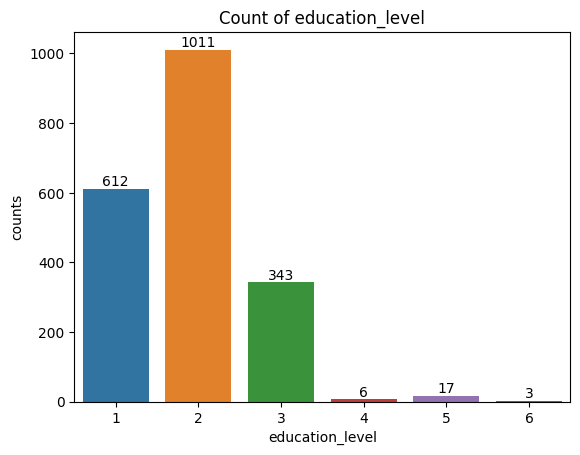

In [1127]:
sns_barplot('education_level', True)

There is 6 category of education level with 5 and 6 as 'Unknown'. Let's assume this as 'Other' education level category which is number 4.

In [1128]:
# df = df[df['education_level'] < 5]
df['education_level'].replace({5: 4, 6: 4}, inplace=True)
df['education_level'].value_counts()

education_level
2    1011
1     612
3     343
4      26
Name: count, dtype: int64

Education Level 5 and 6 successfully replaced with 4.

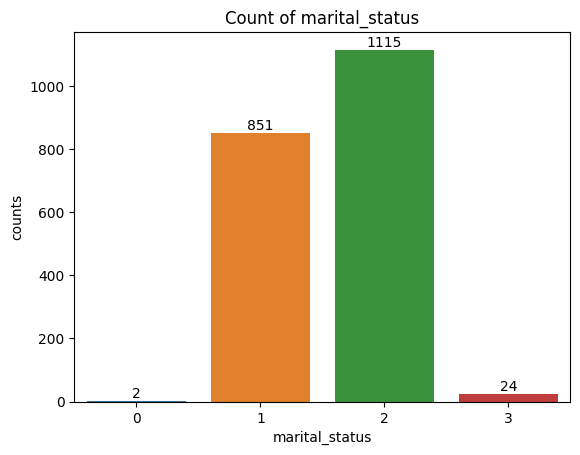

In [1129]:
sns_barplot('marital_status', True)

There is 3 category of marital status 1 is married, 2 is single and 3 is others. We don't have any information about 0, so let's assume 0 as 'Others'.

In [1130]:
df['marital_status'].replace({0: 3}, inplace=True)
df['marital_status'].value_counts()

marital_status
2    1115
1     851
3      26
Name: count, dtype: int64

Marital status 0 successfully replaced with 3 and will be considered as 'Others'.

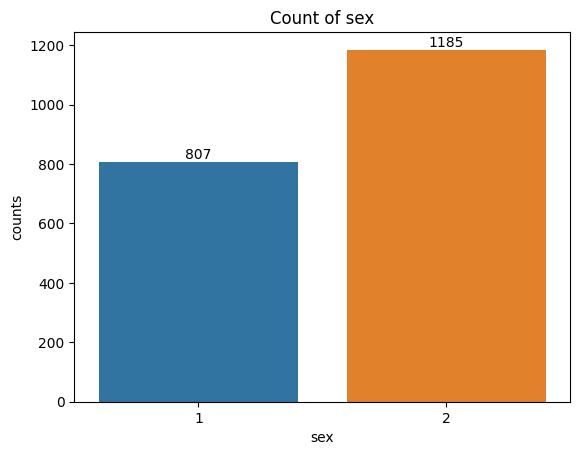

In [1131]:
sns_barplot('sex', True)

Gender data is fine, 1 is male and 2 is female. Already good, we don't touch it.

### 4.2.2 - Ordinal

In [1132]:
df['pay_1'].unique()

array([ 0.,  2.,  1., -1., -2.,  3.,  4.,  5.,  6.])

In [1133]:
df['pay_1'].value_counts()

pay_1
 0.0    1345
 2.0     223
 1.0     193
-1.0     176
-2.0      26
 3.0      21
 4.0       5
 5.0       2
 6.0       1
Name: count, dtype: int64

In [1134]:
def countMultiBarplot(groupby_column, ax, row, col):
    df_barplot = df.groupby(groupby_column).size().reset_index(name='counts')
    sns.barplot(ax=ax[row, col], data=df_barplot, x=groupby_column, y='counts', orient='v')
    # ax[row, col].set_title(groupby_column)

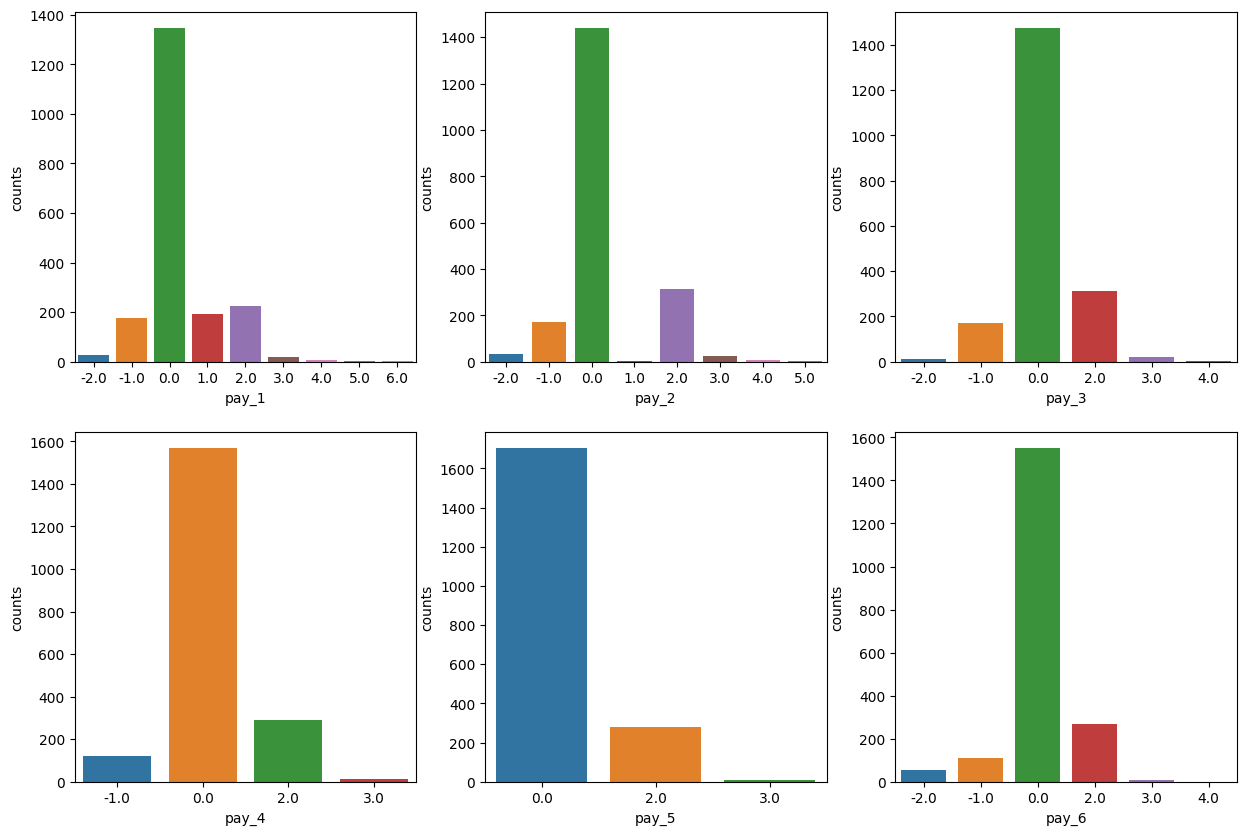

In [1135]:
col = 3
row = 2
pay = 1
fig, ax = plt.subplots(ncols=col, nrows=row, figsize=(15, 10))
for i in range (0, row):
    for j in range (0, col):
        countMultiBarplot('pay_'+str(pay), ax, i, j)
        pay+=1

As we can see from the chart, in all six months most people only paid the minimum amount of their bill.

## 4.3 - Feature Creation

In [1136]:
def ageCat(row):
   if row['age'] < 16:
      return 'Children'
   elif row['age'] < 31:
      return 'Young Adult'
   elif row['age'] < 41:
      return 'Adult'
   elif row['age'] < 51:
      return 'Middle Age'
   else:
      return 'Old Age'

In [1137]:
df['age_cat'] = df.apply(lambda row: ageCat(row), axis=1)

Create a new column `age_cat` to categorize age to minimalize its unique number from 48 to 5.

# 5 - Feature Engineering

## 5.1 - Feature Selection

Based on EDA on point 4, we decided to use all the column on the dataset to create the Model. But replace `age` column with `age_cat` to minimalize unique values.

In [1138]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'def_pay', 'age_cat'],
      dtype='object')

In [1139]:
df_formodel = df[['limit_balance', 'sex', 'education_level', 'marital_status',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'def_pay', 'age_cat']]
df_formodel

,limit_balance,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay,age_cat
0,80000.0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,Old Age
1,200000.0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0,Middle Age
2,20000.0,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1,Young Adult
3,260000.0,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0,Adult
4,150000.0,1,4,2,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,10000.0,2,2,2,0.0,0.0,2.0,2.0,3.0,2.0,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1,Middle Age
1988,100000.0,1,2,1,2.0,2.0,2.0,2.0,3.0,2.0,59586.0,60842.0,61749.0,65130.0,63816.0,65011.0,2800.0,2500.0,5000.0,0.0,2400.0,2400.0,1,Middle Age
1989,20000.0,1,2,2,2.0,3.0,2.0,2.0,3.0,2.0,21034.0,19839.0,18663.0,20394.0,19228.0,19615.0,0.0,0.0,2616.0,0.0,1400.0,0.0,0,Young Adult
1990,130000.0,1,2,2,3.0,2.0,2.0,3.0,3.0,2.0,300.0,300.0,300.0,300.0,300.0,150.0,0.0,0.0,0.0,0.0,0.0,1000.0,1,Adult


In [1140]:
df_formodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    1992 non-null   float64
 1   sex              1992 non-null   int64  
 2   education_level  1992 non-null   int64  
 3   marital_status   1992 non-null   int64  
 4   pay_1            1992 non-null   float64
 5   pay_2            1992 non-null   float64
 6   pay_3            1992 non-null   float64
 7   pay_4            1992 non-null   float64
 8   pay_5            1992 non-null   float64
 9   pay_6            1992 non-null   float64
 10  bill_amt_1       1992 non-null   float64
 11  bill_amt_2       1992 non-null   float64
 12  bill_amt_3       1992 non-null   float64
 13  bill_amt_4       1992 non-null   float64
 14  bill_amt_5       1992 non-null   float64
 15  bill_amt_6       1992 non-null   float64
 16  pay_amt_1        1992 non-null   float64
 17  pay_amt_2     

## 5.2 - Split Feature(X) and Target(y)

In [1141]:
X = df_formodel.drop('def_pay', axis=1)
y = df_formodel['def_pay']

In [1142]:
X.head()

,limit_balance,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,age_cat
0,80000.0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,Old Age
1,200000.0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,Middle Age
2,20000.0,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,Young Adult
3,260000.0,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,Adult
4,150000.0,1,4,2,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,Adult


## 5.3 - Split Train set and Test set

In [1143]:
#Split train and test (80% Train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=21)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size : ', y_test.shape)

Train Size :  (1593, 23)
Test Size :  (399, 23)
y Train Size :  (1593,)
y Test Size :  (399,)


In [1144]:
X_train

,limit_balance,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,age_cat
1613,20000.0,2,2,2,-1.0,-1.0,-1.0,2.0,0.0,0.0,396.0,1301.0,12056.0,11151.0,11219.0,18120.0,1301.0,11151.0,0.0,600.0,8120.0,1500.0,Young Adult
430,50000.0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,25809.0,14888.0,20803.0,18395.0,18386.0,18420.0,2000.0,20000.0,700.0,665.0,727.0,505.0,Adult
1640,10000.0,2,3,2,1.0,2.0,-1.0,2.0,0.0,0.0,4474.0,189.0,3510.0,3306.0,3551.0,5577.0,0.0,3510.0,0.0,300.0,2260.0,2000.0,Middle Age
1436,20000.0,1,2,2,1.0,2.0,2.0,0.0,0.0,0.0,6962.0,7898.0,7626.0,8692.0,9541.0,9885.0,1200.0,0.0,1200.0,1000.0,500.0,500.0,Young Adult
547,30000.0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,26788.0,28352.0,86253.0,28351.0,28571.0,23400.0,2001.0,1600.0,600.0,1000.0,468.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,310000.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,313268.0,278821.0,283847.0,290135.0,293350.0,300623.0,10010.0,11500.0,11015.0,11000.0,12000.0,23035.0,Middle Age
772,120000.0,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,15234.0,8247.0,9624.0,20129.0,10388.0,13316.0,1137.0,1514.0,1069.0,278.0,3000.0,0.0,Young Adult
1848,60000.0,2,2,1,0.0,0.0,2.0,2.0,2.0,2.0,37549.0,40603.0,39676.0,42407.0,41428.0,45576.0,4000.0,0.0,3700.0,0.0,5000.0,2000.0,Adult
1231,340000.0,2,3,1,0.0,-1.0,0.0,0.0,0.0,0.0,11049.0,57301.0,59375.0,60216.0,59842.0,46882.0,57301.0,3000.0,2600.0,1000.0,1817.0,11022.0,Adult


## 5.4 - Handling Outlier

Handling outlier for numerical column `limit_balance` and `age`. Based on EDA at point 4, `limit_balance` and `age` distribution is not normal (skewed distribution), so we use `Tukey's Rule` technique to handle the outliers. To ensure the data distribution isn't changed after split feature, we check it once again as follow.

In [1145]:
print('Distribution of column `Limit Balance`  : ', X_train['limit_balance'].skew())
# print('Distribution of column `Age` : ', X_train['age'].skew())

Distribution of column `Limit Balance`  :  1.2829048753930652


Data distribution is not changed, it's still positively skew same with our check on EDA. Next find the outliers using `Tukey's Rule` technique.

In [1146]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

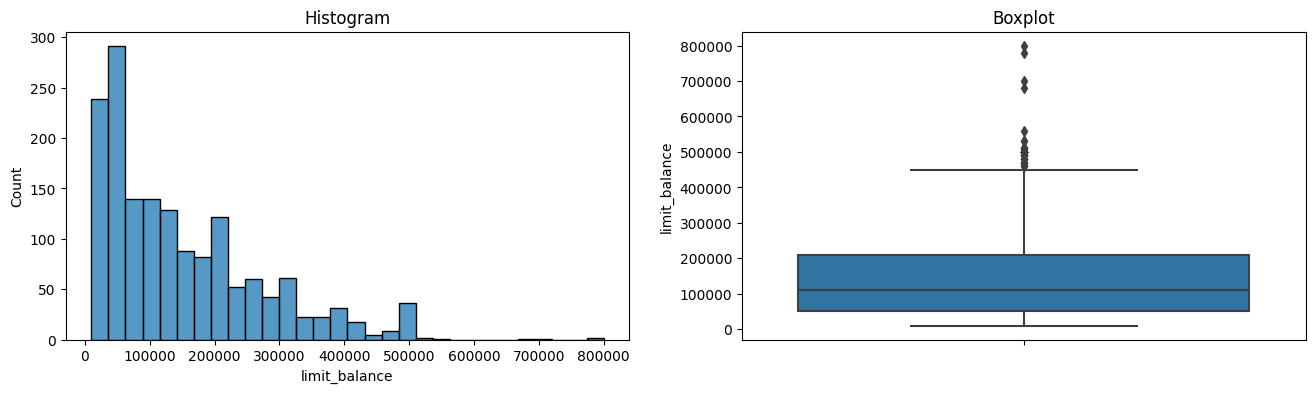

In [1147]:
diagnostic_plots(X_train, 'limit_balance')

In [1148]:
# diagnostic_plots(X_train, 'age')

In [1149]:
def getTukeysRuleBoundary(df, col, iqr_wide):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * iqr_wide)
    upper_boundary = df[col].quantile(0.75) + (IQR * iqr_wide)

    print(f'Lower Boundary {col} : {lower_boundary}')
    print(f'Upper Boundary {col} : {upper_boundary}')

    return lower_boundary, upper_boundary

def getPrecentageOutliers(df, col, upper_b):
    print('Total Data : {}'.format(len(df)))
    print('Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])))
    print('% Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])/len(df) * 100))

In [1150]:
lower_b_limitbalance, upper_b_limitbalance = getTukeysRuleBoundary(X_train, 'limit_balance', 1.5)
# lower_b_age, upper_b_age = getTukeysRuleBoundary(X_train, 'age', 1.5)

Lower Boundary limit_balance : -190000.0
Upper Boundary limit_balance : 450000.0


In [1151]:
getPrecentageOutliers(X_train, 'limit_balance', upper_b_limitbalance)
# print('-----------------------------------------------------------------')
# getPrecentageOutliers(X_train, 'age', upper_b_age)

Total Data : 1593
Data which limit_balance more than 450000.0 : 52
% Data which limit_balance more than 450000.0 : 3.264281230382925


Total outliers for column `limit balance` and `age` is only 52 and 24 row respectively. It's only about 1.5~3.2% of the total data, so it's safe to perform outliers handling.

In [1152]:
# Flag the outliers in column `limit_balance`
outliers_limit_balance = np.where(X_train['limit_balance'] > upper_b_limitbalance, True, np.where(X_train['limit_balance'] < lower_b_limitbalance, True, False))

# Flag the outliers in column `age`
# outliers_age = np.where(X_train['age'] > upper_b_age, True, np.where(X_train['age'] < lower_b_age, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_limit_balance)]# + (outliers_age)]
y_train_trimmed = y_train.loc[~(outliers_limit_balance)]# + (outliers_age)]

print('Size X_train - Before trimming : ', X_train.shape)
print('Size X_train - After trimming  : ', X_train_trimmed.shape)
print('')
print('Size y_train - Before trimming : ', y_train.shape)
print('Size y_train - After trimming  : ', y_train_trimmed.shape)

Size X_train - Before trimming :  (1593, 23)
Size X_train - After trimming  :  (1541, 23)

Size y_train - Before trimming :  (1593,)
Size y_train - After trimming  :  (1541,)


Outliers in column `limit_balance` has been successfully handled.

## 5.5 - Handling Missing Value

In [1153]:
#Check X_train
X_train_trimmed.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
age_cat            0
dtype: int64

In [1154]:
#Check X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
age_cat            0
dtype: int64

In [1155]:
#Check y_train
y_train_trimmed.isnull().sum()

0

In [1156]:
#Check y_test
y_test.isnull().sum()

0

There is no missing value found from all feature(X) and target(y).

## 5.6 - Split Numerical and Categorical Column

In [1157]:
# num_col = X_train_trimmed.select_dtypes(include=np.number).columns.tolist()
# cat_col = X_train_trimmed.select_dtypes(include='object').columns.tolist()
X_train_trimmed

,limit_balance,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,age_cat
1613,20000.0,2,2,2,-1.0,-1.0,-1.0,2.0,0.0,0.0,396.0,1301.0,12056.0,11151.0,11219.0,18120.0,1301.0,11151.0,0.0,600.0,8120.0,1500.0,Young Adult
430,50000.0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,25809.0,14888.0,20803.0,18395.0,18386.0,18420.0,2000.0,20000.0,700.0,665.0,727.0,505.0,Adult
1640,10000.0,2,3,2,1.0,2.0,-1.0,2.0,0.0,0.0,4474.0,189.0,3510.0,3306.0,3551.0,5577.0,0.0,3510.0,0.0,300.0,2260.0,2000.0,Middle Age
1436,20000.0,1,2,2,1.0,2.0,2.0,0.0,0.0,0.0,6962.0,7898.0,7626.0,8692.0,9541.0,9885.0,1200.0,0.0,1200.0,1000.0,500.0,500.0,Young Adult
547,30000.0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,26788.0,28352.0,86253.0,28351.0,28571.0,23400.0,2001.0,1600.0,600.0,1000.0,468.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,310000.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,313268.0,278821.0,283847.0,290135.0,293350.0,300623.0,10010.0,11500.0,11015.0,11000.0,12000.0,23035.0,Middle Age
772,120000.0,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,15234.0,8247.0,9624.0,20129.0,10388.0,13316.0,1137.0,1514.0,1069.0,278.0,3000.0,0.0,Young Adult
1848,60000.0,2,2,1,0.0,0.0,2.0,2.0,2.0,2.0,37549.0,40603.0,39676.0,42407.0,41428.0,45576.0,4000.0,0.0,3700.0,0.0,5000.0,2000.0,Adult
1231,340000.0,2,3,1,0.0,-1.0,0.0,0.0,0.0,0.0,11049.0,57301.0,59375.0,60216.0,59842.0,46882.0,57301.0,3000.0,2600.0,1000.0,1817.0,11022.0,Adult


In [1158]:
X_train_trimmed.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2',
       'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
       'age_cat'],
      dtype='object')

In [1159]:
num_col_skew = ['limit_balance', 
                'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col_ordinal = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
cat_col_nominal = ['age_cat', 'sex', 'education_level', 'marital_status']

In [1160]:
X_train_num_s = X_train_trimmed[num_col_skew]
X_train_cat_o = X_train_trimmed[cat_col_ordinal]
X_train_cat_n = X_train_trimmed[cat_col_nominal]

X_test_num_s = X_test[num_col_skew]
X_test_cat_o = X_test[cat_col_ordinal]
X_test_cat_n = X_test[cat_col_nominal]

Numerical and Categorical column has been successfully splitted both in train-set and test-set.

## 5.7 - Feature Scaling

## 5.7.1 - Scaling Skew Data

In [1161]:
#Scaling Numerical Column with Skew Data
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train_num_s)

MinMaxScaler()

Because the numeric data distribution is not normal or skewed, so we use `MinMaxScaler` to scale the data.

In [1162]:
X_train_num_s_scaled = scaler_mm.transform(X_train_num_s)
X_test_num_s_scaled = scaler_mm.transform(X_test_num_s)

In [1163]:
X_train_num_s_scaled

array([[0.02272727, 0.00511468, 0.13981668, ..., 0.0035286 , 0.03628807,
        0.00874258],
       [0.09090909, 0.05748346, 0.16741762, ..., 0.00391087, 0.00324894,
        0.00294334],
       [0.        , 0.01351825, 0.13755774, ..., 0.0017643 , 0.01009988,
        0.01165678],
       ...,
       [0.11363636, 0.08167618, 0.21965563, ..., 0.        , 0.02234487,
        0.01165678],
       [0.75      , 0.02706741, 0.25357632, ..., 0.005881  , 0.00812013,
        0.0642405 ],
       [0.27272727, 0.26945206, 0.40105756, ..., 0.05528144, 0.01608831,
        0.03205614]])

Numerical data has been successfully scaled.

## 5.8 - Feature Encoding

### 5.8.1 - Encoding Ordinal

In [1164]:
X_train_cat_o

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
1613,-1.0,-1.0,-1.0,2.0,0.0,0.0
430,0.0,0.0,0.0,0.0,0.0,0.0
1640,1.0,2.0,-1.0,2.0,0.0,0.0
1436,1.0,2.0,2.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
48,0.0,0.0,0.0,0.0,0.0,0.0
772,0.0,0.0,0.0,0.0,0.0,0.0
1848,0.0,0.0,2.0,2.0,2.0,2.0
1231,0.0,-1.0,0.0,0.0,0.0,0.0


In [1165]:
# X_train_cat_o_object = X_train_cat_o.copy()
# X_train_cat_o_object = X_train_cat_o_object.astype(int).astype(str)

# X_test_cat_o_object = X_test_cat_o.copy()
# X_test_cat_o_object = X_test_cat_o_object.astype(int).astype(str)

In [1166]:
# pay_order_l_t_h = ['-2', '-1', '0', '1', '2', '3', '4', '5', '6']
# pay_order_h_t_l = ['6', '5', '4', '3', '2', '1', '0', '-1', '-2']
# pay_order = [pay_order_l_t_h, pay_order_l_t_h, pay_order_l_t_h, pay_order_l_t_h, pay_order_l_t_h, pay_order_l_t_h]
age_order = ['Children', 'Young Adult', 'Adult', 'Middle Age', 'Old Age']
od_order = [age_order]

In [1167]:
# od_encoder = OrdinalEncoder(categories=od_order)
# od_encoder.fit(X_train_cat_o[['age_cat']])

In [1168]:
# X_train_cat_o_encoded = od_encoder.transform(X_train_cat_o[['age_cat']])
# X_test_cat_o_encoded = od_encoder.transform(X_test_cat_o[['age_cat']])
X_train_cat_o_encoded = X_train_cat_o
X_test_cat_o_encoded = X_test_cat_o

In [1169]:
# X_train_cat_o_no_age = X_train_cat_o[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
# X_test_cat_o_no_age = X_test_cat_o[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

# X_train_cat_o_encoded = np.concatenate([X_train_cat_o_encoded, X_train_cat_o_no_age], axis=1)
# X_test_cat_o_encoded = np.concatenate([X_test_cat_o_encoded, X_test_cat_o_no_age], axis=1)

We decide to not encode column pay_1 to pay_6 because it already a numerical -2 until 6.

### 5.8.2 - Encoding Nominal

In [1170]:
X_train_cat_n

,age_cat,sex,education_level,marital_status
1613,Young Adult,2,2,2
430,Adult,1,2,1
1640,Middle Age,2,3,2
1436,Young Adult,1,2,2
547,Adult,1,2,2
...,...,...,...,...
48,Middle Age,1,1,2
772,Young Adult,2,2,2
1848,Adult,2,2,1
1231,Adult,2,3,1


In [1171]:
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoder.fit(X_train_cat_n)

OneHotEncoder(handle_unknown='ignore')

In [1172]:
X_train_cat_n_encoded = oh_encoder.transform(X_train_cat_n).toarray()
X_test_cat_n_encoded = oh_encoder.transform(X_test_cat_n).toarray()

## 5.9 Merge Data

In [1173]:
X_train_final = np.concatenate([X_train_num_s_scaled, X_train_cat_o_encoded, X_train_cat_n_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_s_scaled, X_test_cat_o_encoded, X_test_cat_n_encoded], axis=1)

In [1174]:
print(X_train_final)

[[0.02272727 0.00511468 0.13981668 ... 0.         1.         0.        ]
 [0.09090909 0.05748346 0.16741762 ... 1.         0.         0.        ]
 [0.         0.01351825 0.13755774 ... 0.         1.         0.        ]
 ...
 [0.11363636 0.08167618 0.21965563 ... 1.         0.         0.        ]
 [0.75       0.02706741 0.25357632 ... 1.         0.         0.        ]
 [0.27272727 0.26945206 0.40105756 ... 1.         0.         0.        ]]


# 6 - Model Definition

## 6.1 - Logistic Regression

In [1175]:
model_logreg = LogisticRegression()

## 6.2 - SVM

In [1176]:
model_svm = SVC()

## 6.3 - KNN

In [1177]:
model_knn = KNeighborsClassifier(n_neighbors=3)

# 7 - Model Training

## 7.1 - Logistic Regression Training

In [1178]:
model_logreg.fit(X_train_final, y_train_trimmed)

LogisticRegression()

## 7.2 - SVM Training

In [1179]:
model_svm.fit(X_train_final, y_train_trimmed)

SVC()

## 7.3 - KNN Training

In [1180]:
model_knn.fit(X_train_final, y_train_trimmed)

KNeighborsClassifier(n_neighbors=3)

# 8 - Model Evaluation

## 8.1 - Logistic Regression

In [1181]:
# Predict Train and test set
y_pred_train_lg = model_logreg.predict(X_train_final)
y_pred_test_lg = model_logreg.predict(X_test_final)
# print('Accuracy - Train Set : ', model_logreg.score(X_train_final, y_train_trimmed))
# print('Accuracy - Test Set  : ', model_logreg.score(X_test_final, y_test))
print(classification_report(y_train_trimmed, y_pred_train_lg))
print(classification_report(y_test, y_pred_test_lg))
print('Precision Score Train - LogReg : ', precision_score(y_train_trimmed, y_pred_train_lg))
print('Precision Score Test - LogReg : ', precision_score(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1169
           1       0.74      0.45      0.56       372

    accuracy                           0.83      1541
   macro avg       0.79      0.70      0.73      1541
weighted avg       0.82      0.83      0.81      1541

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       300
           1       0.66      0.52      0.58        99

    accuracy                           0.81       399
   macro avg       0.76      0.71      0.73       399
weighted avg       0.80      0.81      0.81       399

Precision Score Train - LogReg :  0.7433628318584071
Precision Score Test - LogReg :  0.6623376623376623


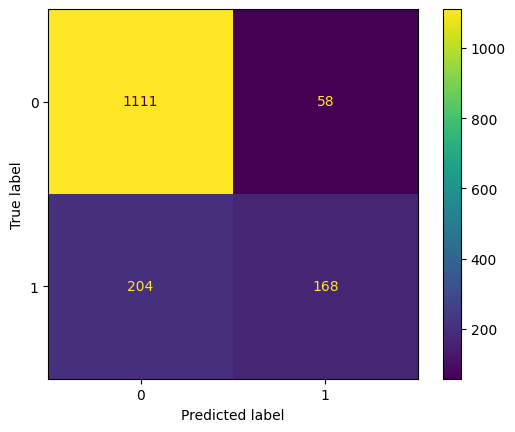

In [1182]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_lg)
ConfusionMatrixDisplay(cm_train).plot()

Using Logistic Regression with default hyperparameter we got `Precision` Score 0.75 for train set and 0.66 for test set. This is kinda bad result for a model, let's check using `Cross Validation` if this model is really bad or just coincidence.

Check result using cross validation mean give almost the same value as train-set prediction rate. About 0.73, so it's not coincedence the model is bad, most likely because the data for target (y) is imbalanced.

## 8.2 - SVM

In [1183]:
# Predict Train and test set
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))
print('Precision - SVM : ', precision_score(y_train_trimmed, y_pred_train_svm))
print('Precision - SVM : ', precision_score(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1169
           1       0.80      0.55      0.65       372

    accuracy                           0.86      1541
   macro avg       0.84      0.75      0.78      1541
weighted avg       0.85      0.86      0.85      1541

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       300
           1       0.69      0.57      0.62        99

    accuracy                           0.83       399
   macro avg       0.78      0.74      0.76       399
weighted avg       0.82      0.83      0.82       399

Precision - SVM :  0.803921568627451
Precision - SVM :  0.691358024691358


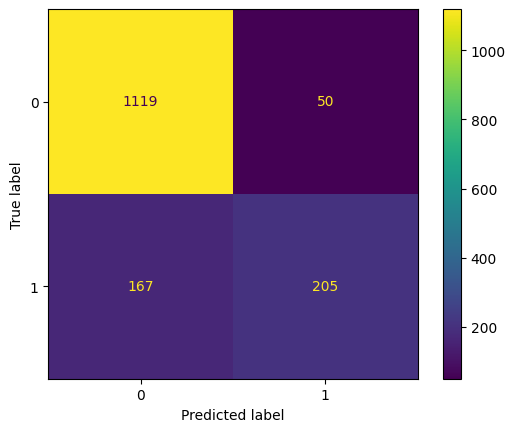

In [1184]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_svm)
ConfusionMatrixDisplay(cm_train).plot()

Using SVM with default hyperparameter we got worst `precision` compared to Logistic Regression which is 0.73 for train set and 0.64 for test set. Let's check using `KNN` Model.

## 8.3 - KNN

In [1185]:
# Predict Train and test set
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))
print('Precision - SVM : ', precision_score(y_train_trimmed, y_pred_train_knn))
print('Precision - SVM : ', precision_score(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1169
           1       0.79      0.61      0.69       372

    accuracy                           0.87      1541
   macro avg       0.84      0.78      0.80      1541
weighted avg       0.86      0.87      0.86      1541

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       300
           1       0.59      0.57      0.58        99

    accuracy                           0.79       399
   macro avg       0.72      0.72      0.72       399
weighted avg       0.79      0.79      0.79       399

Precision - SVM :  0.7874564459930313
Precision - SVM :  0.5894736842105263


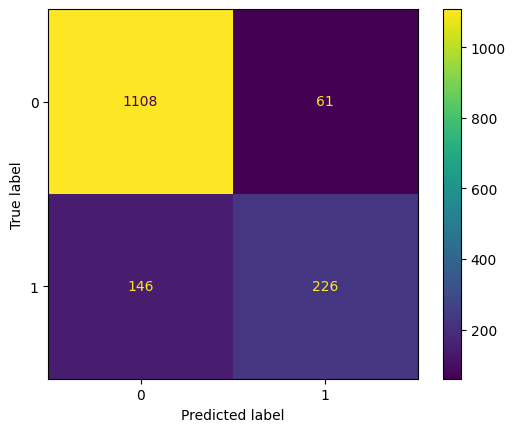

In [1186]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_knn)
ConfusionMatrixDisplay(cm_train).plot()

Using KNN Model with default hyperparameter we got better `precision` for train set compared to SVM which is 0.81 but the test set is much worst at 0.53. The model seems to overfitting. Overall all the model give bad result, so we will try to improve it with hyperparameter tuning.

# 9 - Model Improvement

## 9.1 - Logistic Regression

In [1187]:
#Create Param Tuning for Logistic Regression
grid_search_params_LR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'dual': [True, False],
    'C': [0.1, 1, 50],
    'fit_intercept': [True, False],
    # 'intercept_scaling': [0.30, 0.35],
    'solver': ['saga', 'liblinear'],
    'verbose': [0, 1],
    'l1_ratio': [0.1, 0.2],
    'max_iter': [2, 3, 4],
    'multi_class': ['auto','ovr','multinomial'],
    'random_state': [5]
}

In [1188]:
lr_gridcv = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_search_params_LR, cv=3, n_jobs=-1, verbose=2, scoring='precision')
lr_gridcv.fit(X_train_final, y_train_trimmed)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 50], 'dual': [True, False],
                         'fit_intercept': [True, False], 'l1_ratio': [0.1, 0.2],
                         'max_iter': [2, 3, 4],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [5], 'solver': ['saga', 'liblinear'],
                         'verbose': [0, 1]},
             scoring='precision', verbose=2)

In [1189]:
lr_gridcv.best_params_
#{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga', 'verbose': 0}

{'C': 0.1,
 'dual': False,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 3,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'random_state': 5,
 'solver': 'saga',
 'verbose': 0}

In [1190]:
lr_gridcv_best = lr_gridcv.best_estimator_

In [1191]:
y_pred_train_lg = lr_gridcv_best.predict(X_train_final)
y_pred_test_lg = lr_gridcv_best.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_lg))
print(classification_report(y_test, y_pred_test_lg))
print('Precision Score Train - LogReg : ', precision_score(y_train_trimmed, y_pred_train_lg))
print('Precision Score Test - LogReg: ', precision_score(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1169
           1       0.73      0.38      0.50       372

    accuracy                           0.82      1541
   macro avg       0.78      0.67      0.70      1541
weighted avg       0.80      0.82      0.79      1541

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       300
           1       0.68      0.47      0.56        99

    accuracy                           0.81       399
   macro avg       0.76      0.70      0.72       399
weighted avg       0.80      0.81      0.80       399

Precision Score Train - LogReg :  0.7258883248730964
Precision Score Test - LogReg:  0.6811594202898551


After we use severall hyperparameter tuning, we found hyperparameter that work best for `Logistic Regression` model. The result is better than the baseline model, from 0.74 - 0.66 Train-Set to 0.72 - 0.68 Train-Set. But let's check another model using different hyperparameter.

In [1192]:
precision_train_cross_val = cross_val_score(lr_gridcv_best, X_train_final, y_train_trimmed, cv=5, scoring="precision")
print('Precision Train - All - Cross Validation  : ', precision_train_cross_val)
print('Precision Train - Mean - Cross Validation : ', precision_train_cross_val.mean())

Precision Train - All - Cross Validation  :  [0.72972973 0.83870968 0.72093023 0.59375    0.76086957]
Precision Train - Mean - Cross Validation :  0.7287978409849231


Check result using `cross validation` mean give almost the same value as train-set prediction rate. About 0.76, so the model result is not coincedence.

## 9.2 - SVM

In [1193]:
#Create Param Tuning for SVM
grid_search_params_SVM = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 50, 200, 500],
    'gamma': [0.1, 1, 50, 200, 500]
}

In [1194]:
svm_gridcv = GridSearchCV(estimator=SVC(), param_grid=grid_search_params_SVM, cv=5, n_jobs=-1, verbose=2, scoring='precision')
svm_gridcv.fit(X_train_final, y_train_trimmed)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 50, 200, 500],
                         'gamma': [0.1, 1, 50, 200, 500], 'kernel': ['rbf']},
             scoring='precision', verbose=2)

In [1195]:
svm_gridcv.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [1196]:
svm_gridcv_best = svm_gridcv.best_estimator_

In [1197]:
y_pred_train_svm = svm_gridcv_best.predict(X_train_final)
y_pred_test_svm = svm_gridcv_best.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))
print('Precision Score Train - SVM : ', precision_score(y_train_trimmed, y_pred_train_svm))
print('Precision Score Test - SVM : ', precision_score(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1169
           1       0.78      0.45      0.57       372

    accuracy                           0.84      1541
   macro avg       0.81      0.71      0.74      1541
weighted avg       0.83      0.84      0.82      1541

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       300
           1       0.66      0.47      0.55        99

    accuracy                           0.81       399
   macro avg       0.75      0.70      0.72       399
weighted avg       0.80      0.81      0.80       399

Precision Score Train - SVM :  0.7752293577981652
Precision Score Test - SVM :  0.6619718309859155


After we use severall hyperparameter tuning, we found hyperparameter that work best for `SVM` model. The result is bit better than the baseline SVM model, but it's still overfit. So we will check another model using different hyperparameter.

## 9.3 - KNN

In [1198]:
#Create Param Tuning for KNN 15, 50
grid_search_params_KNN = {
    'n_neighbors': [11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [1199]:
knn_gridcv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_search_params_KNN, cv=5, n_jobs=-1, verbose=2, scoring='precision')
knn_gridcv.fit(X_train_final, y_train_trimmed)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='precision', verbose=2)

In [1200]:
knn_gridcv.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [1201]:
knn_gridcv_best = knn_gridcv.best_estimator_

In [1202]:
y_pred_train_knn = knn_gridcv_best.predict(X_train_final)
y_pred_test_knn = knn_gridcv_best.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))
print('Precision Score Train - KNN : ', precision_score(y_train_trimmed, y_pred_train_knn))
print('Precision Score Test - KNN : ', precision_score(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1169
           1       0.74      0.40      0.52       372

    accuracy                           0.82      1541
   macro avg       0.79      0.68      0.71      1541
weighted avg       0.81      0.82      0.80      1541

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       300
           1       0.69      0.46      0.55        99

    accuracy                           0.81       399
   macro avg       0.76      0.70      0.72       399
weighted avg       0.80      0.81      0.80       399

Precision Score Train - KNN :  0.7389162561576355
Precision Score Test - KNN :  0.6865671641791045


In [1203]:
precision_train_cross_val = cross_val_score(knn_gridcv_best, X_train_final, y_train_trimmed, cv=3, scoring="precision")
print('Precision - All - Cross Validation  : ', precision_train_cross_val)
print('Precision Score - Mean - Cross Validation : ', precision_train_cross_val.mean())

Precision - All - Cross Validation  :  [0.76       0.66129032 0.73846154]
Precision Score - Mean - Cross Validation :  0.7199172870140612


After severall hyperparameter tuning, we got the best parameter and result using `KNN` model. With 0.74 `precision` score on train-set and 0.69 on test-set. The different between train result and test result is small, but we need more `precision` score to make the model good fit. Let's change the threeshold a bit.

## 9.4 - Change Threshold

### 9.4.1 - Logistic Regression

In [1204]:
threshold = 0.6

In [1205]:
y_pred_new_proba_train = lr_gridcv_best.predict_proba(X_train_final)
y_pred_new_train = np.where(y_pred_new_proba_train[:,1] >= threshold, 1, 0)

y_pred_new_proba_test = lr_gridcv_best.predict_proba(X_test_final)
y_pred_new_test = np.where(y_pred_new_proba_test[:,1] >= threshold, 1, 0)

print(classification_report(y_train_trimmed, y_pred_new_train))
print(classification_report(y_test, y_pred_new_test))
print('LogReg Precision - Train Set : ', precision_score(y_train_trimmed, y_pred_new_train))
print('LogReg Precision - Test Set : ', precision_score(y_test, y_pred_new_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1169
           1       0.75      0.30      0.43       372

    accuracy                           0.81      1541
   macro avg       0.78      0.63      0.66      1541
weighted avg       0.80      0.81      0.77      1541

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       300
           1       0.70      0.39      0.50        99

    accuracy                           0.81       399
   macro avg       0.76      0.67      0.69       399
weighted avg       0.79      0.81      0.79       399

LogReg Precision - Train Set :  0.7516778523489933
LogReg Precision - Test Set :  0.6964285714285714


### 9.4.2 - KNN

In [1206]:
y_pred_new_proba_train = knn_gridcv_best.predict_proba(X_train_final)
y_pred_new_train = np.where(y_pred_new_proba_train[:,1] >= threshold, 1, 0)

y_pred_new_proba_test = knn_gridcv_best.predict_proba(X_test_final)
y_pred_new_test = np.where(y_pred_new_proba_test[:,1] >= threshold, 1, 0)

print(classification_report(y_train_trimmed, y_pred_new_train))
print(classification_report(y_test, y_pred_new_test))
print('KNN Precision - Train Set : ', precision_score(y_train_trimmed, y_pred_new_train))
print('KNN Precision - Test Set : ', precision_score(y_test, y_pred_new_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1169
           1       0.77      0.35      0.49       372

    accuracy                           0.82      1541
   macro avg       0.80      0.66      0.69      1541
weighted avg       0.81      0.82      0.79      1541

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       300
           1       0.74      0.43      0.55        99

    accuracy                           0.82       399
   macro avg       0.79      0.69      0.72       399
weighted avg       0.81      0.82      0.80       399

KNN Precision - Train Set :  0.7674418604651163
KNN Precision - Test Set :  0.7413793103448276


After changing threshold for best `Logistic Regresion` and `KNN` model we got the best result. We change the threshold to 0.6 from 0.5 and the `KNN` model give a 0.77 `precision` score on train-set and 0.74 `precision` score on test-set. Finally we get the model that give `Goodfit` as a result. So we will use this model.

# 10 - Model Analysis

- To analyze this model, we use `precision` metrics because we want to maximize the model to correctly predict positive as much as it can.

- From all the three model we tried as baseline, `Logistic Regression` model give us the best result compared to `SVM` and `KNN` with precision score 0.74 on train-set and 0.66 on test-set. However all the model give us a bad result, because it seems to be overfit, especially `KNN` model which precision score is 0.78 on train-set and 0.58 on test set. So we need to improve all the model using hyperparameter tuning.

- After hyperparameter tuning, The result for `Logistic Regression` is 0.72 precision score on train-set and 0.68 precision score on test-set. This is a bit better than the baseline model, while `SVM` after hyperparameter tuning still gave a bad result wich is 0.77 and 0.66 on train and test set respectively. Then `KNN` result of hyperparameter tuning is very good compared to its baseline, which is 0.74 and 0.69 precision score on train and test set. So we can assume `KNN` is best model after hyperparameter tuning improvement, but we still need to improve its precision to make it goodfit, so we try to give it a threshold.

- After giving a threshold by 0.6 on our two best model `Logistic Regression` and `KNN`, as we can see `KNN` give more good result with 0.77 precision score on train-set and 0.74 precision score on test-set, these can already be categorized as `Goodfit`. Compared to all the result before this is the best result we got so far, so we will use this model for inferencing.

# 11 - Conclusion

- Based on the EDA of Bill Statement and Payment, we can see the average amount of bill statement is keep declined in the last 6 month. Means people are using their credit card less during this period.

- Based on model evaluation and model improvement, out of 3 model we tried, the best model is `KNN` after hyperparameter tuning and set the threshold at 0.6. This model give 76% precision score which mean it can correctly predict 76 out of 100 data.

- But this model still has a weaknesses, which is its precision score. The best precision score we can get is only 76%. The problem is because data of target(y) is imbalance, there is only 400~ positive data from all 1900~ data target(y).

- For next improvement, we can try to do oversampling on the data. Oversampling instead of undersampling simply because the dataset contains small data, with only 1900~ data. SMOTE is a good technique to try with this dataset and has a possibility to improve the result.

# 12 - Model Saving for Inference Dataset

In [1207]:
#MODEL
with open('model_knn.pkl', 'wb') as file_1:
    pickle.dump(knn_gridcv_best, file_1)

#SCALER
with open('model_scaler_mm.pkl', 'wb') as file_2:
    pickle.dump(scaler_mm, file_2)

#ENCODER
with open('model_oh_encoder.pkl', 'wb') as file_3:
    pickle.dump(oh_encoder, file_3)

#NUMERICAL
with open('list_num_column_skew.txt', 'wb') as file_4:
    pickle.dump(num_col_skew, file_4)

#CATEGORICAL
with open('list_cat_column_ordinal.txt', 'wb') as file_5:
    pickle.dump(cat_col_ordinal, file_5)

with open('list_cat_column_nominal.txt', 'wb') as file_6:
    pickle.dump(cat_col_nominal, file_6)

# 13 - Conceptual Problem

## 13.1 - Apakah yang dimaksud dengan coeficient pada logistic regression?

In [1208]:
print('Coefficient : ', lr_gridcv_best.coef_)

Coefficient :  [[-1.03917838e-01 -2.66748767e-04 -1.21193502e-03  0.00000000e+00
  -3.84295212e-04 -2.86122321e-04 -1.15478498e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.20420073e-01  4.38495587e-02  1.29731472e-01
   7.00497331e-02  1.35485944e-01  6.05903923e-02 -4.42988800e-03
   1.88401165e-03 -1.82507709e-03  4.67510652e-04 -8.65097652e-03
   9.73655400e-04  0.00000000e+00  5.50590090e-02 -2.76235465e-04
   0.00000000e+00 -1.22298149e-03 -2.93935039e-03  0.00000000e+00]]


Diatas adalah list _coefficient_ dari _logistic regression_. Jumlah nilai _coefficient_ sesuai dengan jumlah _feature_(X) yang digunakan. Karena setiap _feature_(X) akan dikalikan dengan _coefficient_ nya masing - masing.

## 13.2 - Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!



Kernel pada SVM berfungsi untuk mentransform _feature_ kedalam dimensi yang lebih besar. Misalnya dari 2D menjadi 3D atau 4D untuk memudahkan model dalam mengklasifikasikan data sehingga lebih efektif. Terdapat beberapa kernel dalam SVM, yang sering digunakan diantaranya adalah :
- Linear Kernel : Digunakan ketika kita mengetahui distribusi datanya linear, dapat digunakan sebagai baseline sebelum mencoba kernel yang lain.
- Polynomial Kernel : Digunakan ketika kita mengetahui distribusi datanya tidak linear.
- RBF Kernel : Digunakan ketika kita tidak memiliki pengetahuan tentang distribusi datanya.

## 13.3 - Bagaimana cara memilih `K` yang optimal pada KNN ?

Dalam menentukan nilai K pada model KNN, tidak terdapat cara yang optimal untuk langsung menentukan nilai terbaik K. Kita perlu mencoba memasukan nilai K terlebih dahulu lalu kemudian membandingkan hasilnya dengan nilai K yang lain. Dalam model klasifikasi disarankan untuk memberikan nilai K dengan angka ganjil.

## 13.4 - Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- _Accuracy_ adalah metrics yang digunakan untuk mengevaluasi klasifikasi model dengan menghitung prosentase prediksi yang benar dari seluruh data, semakin tinggi nilainya maka semakin bagus. Tetap _accuracy_ kurang cocok jika digunakan dalam data yang tidak imbang, sebagai contoh jika terdapat 100 data, ada 80 A dan 20 B, model berhasil memprediksi seluruh A yaitu 80, sedangkan hanya 10 B yang berhasil diprediksi, dari khasus ini _accuracy_ akan memberikan nilai 90% karena model berhasil memprediksi 90 (80 A + 10 B) data dengan benar meskipun prediksi untuk B itu sendiri hanya 50% dari data B.

- _Precision_ adalah metrics yg digunakan untuk mengevaluasi klasifikasi model jika kita ingin memaksimalkan presisi dari prediksi model. Sebisa mungkin jangan sampai ada yang salah prediksi, meminimalisir salah prediksi.

- _Recall_ adalah metrics yg digunakan untuk mengevaluasi klasifikasi model jika kita ingin memaksimalkan jumlah positif yang terprediksi. Kebalikan dari _precision_, _recall_ tidak mengutamakan presisi, sehingga seringkali akan salah memprediksi, tetapi lebih memaksimalkan seluruh data positifnya harus terprediksi.

- _F1 Score_ adalah metrics yg digunakan untuk mengevaluasi klasifikasi model jika ingin menyeimbangkan nilai dari _precision_ dan _recall_.

In [1209]:
# X_train_trimmed.tail().reset_index().to_dict()